## Lecture 08
## Optimization in Python 
### March 22, 2021

In [1]:
!pip install jaxlib
!pip install cvxpy

zsh:1: command not found: pip
zsh:1: command not found: pip


In [2]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import optimize

### Optimization

- In general, optimization is the process of finding the optimal element
from a set of feasible candidates.


- A universally important mathematical tool, it has been developed and adopted for use in many fields of science and engineering.


- Terminology: for example, the mathematical function that is optimized may be called a cost function, loss function, energy function, or objective function, to mention a few. Here we use the generic term *objective function*.

$$\min_{x \in C} f(x)$$


- Optimization is closely related to solving equations: indeed, finding the optimum of a function is often related to finding a point with zero gradient (a *stationary point*). 

$$x \in \arg\min_{x \in \mathbb R^d} f(x) \quad \implies \quad \nabla f(x) = 0$$

- The converse, however, is not necessarily true (it is true for *convex* functions). Nevertheless, it is common to solve optimization problems by searching for stationary points (zeros of the gradient). In some cases, one can check optimality of and test the resulting candidates for optimality, though this is not possible in general.


- We discuss modules: **SciPy** for nonlinear optimization problems, and **cvxpy** for convex optimization problems (here an example of a linear programming problem). Nonlinear optimization often benefits from the ability to compute gradients or hessians of the objective function, and we will discuss *automatic differentiation* with **JAX**.


Optimization problem: 
---

Consider an objective (function) $f(x): \mathbf{R}^n \to \mathbf{R}$ 
and constraints (functions) $g_i(x), h_j(x) : \mathbf{R}^n \to \mathbf{R}$. Consider:

$$\min f(x)$$
$$s.t.$$
$$g_i(x) = 0 \quad i=1,\dots, m$$
$$h_j(x) \leq 0 \quad i=1,\dots, p$$.





This form is general, since a maximization problem can be cast as a minimization problem:
$$\max f(x) \equiv \min -f(x).$$

---

- A general mathematical optimization on this form is difficult to solve, and there are no efficient methods for solving completely generic optimization
problems. 

- There are efficient methods for many important special cases, and it is
therefore important to know as much as possible about the objective functions and the constraints in order to be able to solve a problem.

---

- The problem is **univariate** or one dimensional if $x$ is a scalar, and multivariate or multidimensional if $x$ is a vector. 


- For high-dimensional objective functions with larger $n$ (where $x \in \mathbf{R}^n$), the optimization problem is harder and more computationally demanding to solve. 


- If the objective function $f$ and the constraints $g_i, h_j$ all are linear (e.g. $f(x) = c^T x$), the problem is a linear optimization problem, or **linear programming** problem. 


- If either the objective function or the constraints are nonlinear, it is a nonlinear optimization problem, or **nonlinear programming** problem. 


- Finally, handling equality and inequality constraints require different approaches.

- Of course, general nonlinear problems can be much harder to solve than linear problems, because they have a
wider variety of possible behaviors. 


- A general nonlinear problem can have both local and global minima,
which turns out to make it very difficult to find the global minima



- Iterative solvers may often converge to
local minima rather that the global minima, or may even fail to converge altogether if there are both local
and global minima. 




### Optimization of continuous and smooth functions

- Optimization of continuous and smooth functions are closely related to nonlinear equation solving,
because extremal values of a function $f (x)$ correspond to points where its **derivative**, or **gradient** , is zero, i.e. $$f'(x) = 0$$ or $$\nabla f(x) = 0,$$ respectively.



- Here $\nabla f(x) = \left(\partial f(x) / \partial x_0, \dots, \partial f(x) / \partial x_{n - 1}\right)^T$.



- Finding candidates for the optimal value is equivalent to solving (in general nonlinear) equations. 


- A solution, (a **stationary point**), does not necessarily correspond to a minimum of $f(x)$.



- It can also be maximum or a saddle point! https://en.wikipedia.org/wiki/Saddle_point


- Candidates should therefore be tested for optimality; for unconstrained objective functions, we test the higher-order derivatives $f^{(k)}(x)$, or the Hessian matrix 

$$\Big\{ \frac{\partial^2 f(x)}{\partial x_i \partial x_j} \Big\}_{i,j}$$


- However, an important subclass of nonlinear problems that can be solved efficiently are (strictly) **convex problems**, which are directly related to the absence of strictly local minima and the existence of a **unique global minimum**.

**Some examples**

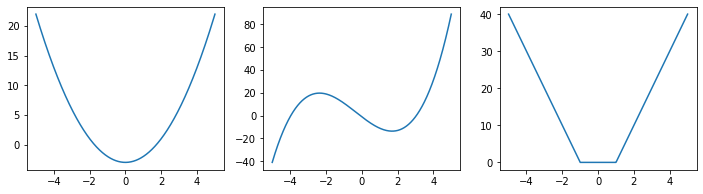

In [3]:
import math 

f1 = lambda x : x ** 2 - 3
f2 = lambda x : x ** 3 + x ** 2 - 12 * x - 1
f3 = lambda x : 10 * (abs(x) - 1) * (abs(x) > 1)

x = np.linspace(- 5, 5, 1000)

plt.figure(figsize=(12,3))

plt.subplot(1,3,1)
plt.plot(x, f1(x))

plt.subplot(1,3,2)
plt.plot(x, f2(x))

plt.subplot(1,3,3)
plt.plot(x, f3(x))


- Newton’s method for root finding is an example of a quadratic approximation method that can be applied to find roots (zeros) of a function: https://en.wikipedia.org/wiki/Newton%27s_method

$$x_{t+1} = x_t - f(x_t) / f'(x_t)$$


- By applying the method to the derivative rather than the function itself, we obtain an optimization algorithm: https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization

$$x_{t+1} = x_t - f'(x_t) / f''(x_t)$$


- The method can converge quickly if started close to an optimal point, but may not converge at all 
if started too far from the optimal value!

---

This formula also requires evaluating both the derivative and the second-order derivative in each iteration.

**Example**
---
Minimize the area of a cylinder with unit volume.


$$f ( [ r , h ] ) := 2 \pi r^2 + 2 \pi rh$$
subject to the equality constraint
$$g ( [ r , h ] ) := r^2 \pi h - 1 = 0$$


### Symbolic solution using Sympy

[https://www.sympy.org/en/index.html](https://www.sympy.org/en/index.html)


In [4]:
import sympy
r, h = sympy.symbols("r, h")
Area = 2 * sympy.pi * r ** 2 + 2 * sympy.pi * r * h
Volume = sympy.pi * r ** 2 * h
h_r = sympy.solve(Volume - 1)[0] # h_r = h(r) a function of r
Area_r = Area.subs(h_r)

# solve in r
rsol = sympy.solve(Area_r.diff(r))[0]

In [5]:
rsol

2**(2/3)/(2*pi**(1/3))

In [6]:
_.evalf()

0.541926070139289

Verify that the second derivative is positive, and so that rsol corresponds to a minimum:

In [7]:
Area_r.diff(r, 2).subs(r, rsol)

12*pi

In [8]:
Area_r.subs(r, rsol)

3*2**(1/3)*pi**(1/3)

In [9]:
_.evalf()

5.53581044593209

### Numerical optimization with `scipy.optimize`

- Typically (for more practical problems) one needs to apply numerical techniques. 

- To solve the problem by using SciPy’s numerical optimization functions.

- First define a Python function that implements the objective function. 

- To solve the optimization problem, use e.g. **optimize.brent**. 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brent.html

In [10]:
# numerical solving
# by using that the optimal h(r) = 1/(pi * r ** 2)

def f(r):
    return 2 * np.pi * r**2 + 2 / r

- When possible, it is a good idea to visualize the objective function before attempting a numerical optimization

- It can help identifying a suitable initial interval for the numerical optimization routine.

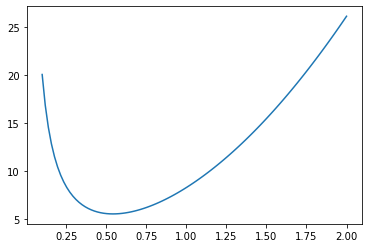

In [11]:
r = np.linspace(0.1, 2, 100)
plt.plot(r, f(r))

In [12]:
# numerical solving
# by using that the optimal h(r) = 1/(pi * r ** 2)
def f(r):
    return 2 * np.pi * r**2 + 2 / r

r_min = optimize.brent(f, brack=(0.1, 3))

print("rmin:", r_min)
print("f(rmin):", f(r_min))

rmin: -5.878533326985533e-12
f(rmin): -340220917149.34357


---

We can also use: **optimize.minimize_scalar**
    
[https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html)

In [13]:
optimize.minimize_scalar(f, bracket=(0.1, 5))

     fun: 5.535810445932086
    nfev: 17
     nit: 13
 success: True
       x: 0.5419260648976671

In [14]:
optimize.minimize_scalar(f, bounds=(0.1, 5), method="bounded")

     fun: 5.535810445969933
 message: 'Solution found.'
    nfev: 14
  status: 0
 success: True
       x: 0.541924653160397

### Unconstrained Multivariate Optimization


Issues in higher dimensions:
* solving nonlinear equations analytically is usually infeasible
* brute-force on a grid becomes "cursed"
* local search involves choosing a good direction; different directions may exhibit very different behavior (*poor conditioning*)
* gradients are important, hessians are useful (Newton's method) but may be intractable

### Steepest Descent
---

The negative gradient locally minimizes a first order Taylor expansion of $f$: $f(x_k + v) \approx f(x_k) + v^T \nabla f(x_k)$.

As minimization strategy, it is therefore sensible to move along this direction with a step-size $\alpha_k$. 

This method is known as the steepest descent method, and it gives the iteration formula:

$$x_{k + 1} := x_k − \alpha_k \nabla f(x_k)$$

Issue: can be slow when different directions have different scales (bad conditioning)

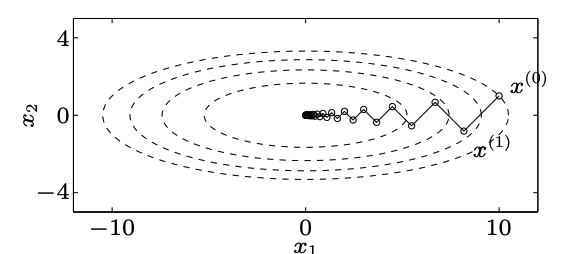

### Newton’s method
----

Newton’s method for multivariate optimization is a modification of the steepest descent method that
can improve convergence, by taking into account the local curvature of the objective in all directions.

The sequence of points $x_k$ for $k \geq 0$ is:

$$x_{k + 1} := x_k − H^{-1} (x_k) \nabla f(x_k)$$

where the Hessian matrix is given by:

$$H(u) = \left\{ \frac{\partial^2 f(u)}{\partial u_i \partial u_j} \right\}_{i,j=1}^n$$

and $u = (u_1, u_2, \dots, u_n)$.

Minimizes a second-order Taylor expansion: $f(x_k + v) \approx f(x_k) + v^T \nabla f(x_k) + \frac{1}{2} v^T H(x_k) v$


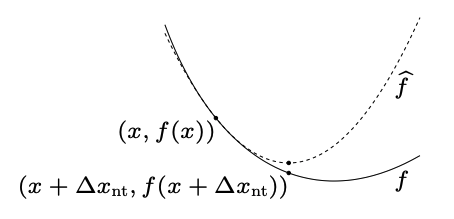

### Newton’s method - implementation 
---

In SciPy, Newton’s method is implemented in the function **optimize.fmin_ncg**. This function takes the
following arguments: a Python function for the objective function, a starting point, a Python function for
evaluating the gradient, and (optionally) a Python function for evaluating the Hessian.

---
**Example**

Consider the following problem: $$\min_x f ( x )$$ where
the objective function is $$f ( x ) = ( x_0 - 1 )^4 + 5 ( x_1 - 1 )^2 - 2 x_0 x_1.$$ 




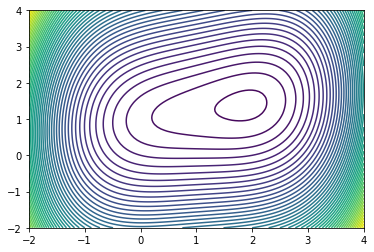

In [15]:
def f_(x0, x1):
    return (x0 - 1) ** 4 + 5 * (x1 - 1) ** 2 - 2 * x0 * x1

# a contour plot
x1 = x2 = np.linspace(-2, 4, 100)
X1, X2 = np.meshgrid(x1, x2)

# contours
c = plt.contour(X1, X2, f_(X1, X2), 50)


- To apply Newton’s method, we need to calculate
the gradient and the Hessian. 

- For this particular case, this can easily be done by hand. 



In [16]:
def f(x):
    return (x[0] - 1) ** 4 + 5 * (x[1] - 1) ** 2 - 2 * x[0] * x[1]

def fprime(x):
    return np.array([4 * (x[0] - 1) ** 3 - 2 * x[1], 10 * (x[1] - 1) - 2 * x[0]])

def fhess(x):
    return np.array([[12. * (x[0] - 1) ** 2, -2.],
                     [-2., 10.]])

## Automatic differentiation with JAX
https://github.com/google/jax

* JAX provides a simple a flexible framework for computing gradients/hessians of Numpy functions
* For a Python function `f` that computes $f(x)$, `grad(f)` is a Python function that computes $\nabla f(x)$
* The function is obtained by *tracing* all operations and using *foward-* or *reverse-mode automatic differentiation* (for this to work, elementary operations need to use `jax.numpy` instead of `numpy`)
* JAX also provides JIT compilation (`jax.jit`), vectorization (`jax.vmap/pmap`), and GPU/TPU support

In [17]:
import jax.numpy as jnp
from jax import jit, grad, hessian

ff = jit(f)
ffprime = jit(grad(f))
ffhess = jit(hessian(f))

In [18]:
x = np.array([1., 1.])
f(x), fprime(x), fhess(x)

(-2.0,
 array([-2., -2.]),
 array([[ 0., -2.],
        [-2., 10.]]))

In [19]:
ff(x), ffprime(x), ffhess(x)

(DeviceArray(-2., dtype=float32),
 DeviceArray([-2., -2.], dtype=float32),
 DeviceArray([[ 0., -2.],
              [-2., 10.]], dtype=float32))

## A short primer on automatic differentiation

See also [JAX autodiff cookbook](https://jax.readthedocs.io/en/latest/notebooks/autodiff_cookbook.html) or [these slides](https://mblondel.org/teaching/autodiff-2020.pdf) by M. Blondel.

Let $F : \mathbb R^n \to \mathbb R^m$.
The **Jacobian** matrix of $F$ at $x$ is defined by

$$J_F(x) = \left(\begin{matrix} \frac{\partial F_1}{\partial x_1}(x) & \cdots & \frac{\partial F_1}{\partial x_n}(x) \\
\vdots & \ddots & \vdots \\
\frac{\partial F_m}{\partial x_1}(x) & \cdots & \frac{\partial F_m}{\partial x_n}(x) \end{matrix} \right) \in \mathbb R^{m \times n}$$

E.g., if $m = 1$ we have $J_F(x) = \nabla F(x)^T$.

A sequence of Python/Numpy operations can be seen to form a graph of elementary operations for which gradients/Jacobians are known.

For example, assume $F: \mathbb R^n \to \mathbb R^m$ is given by $F(x) = f(g(h(x)))$.




### JVPs, forward-mode
*Jacobian-vector product (JVP):* for a vector $v \in \mathbb R^n$, we have by the chain rule:
$$ J_F(x) v = J_f(g(h(x))) J_g(h(x)) J_h(x) v$$

*Forward-mode* differentiation: right-to-left matrix-vector multiplication, usually more efficient when $m > n$.

Full Jacobian can be obtained by computing JVPs for all $v = e_j$ for $j = 1, \ldots, n$.
Implemented in JAX with `jax.jacfwd`.

### VJPs, reverse-mode
*Vector-Jacobian product (VJP):* for a vector $u \in \mathbb R^m$, we have
$$ u^T J_F(x) = u^T J_f(g(h(x))) J_g(h(x)) J_h(x)$$

*Reverse-mode* differentiation: left-to-right multiplication, usually more efficient when $m < n$ (but requires to store intermediate Jacobians).

Full Jacobian obtained by computing VJPs for $u = e_i$ for $i = 1, \ldots, m$. Implemented in JAX with `jax.jacrev`.



### Usage in optimization and machine learning

Many use-cases in optimization and machine learning have $m = 1$ (scalar objective function), and reverse-mode autodiff is best suited in this case for computing gradients.

Computing **Hessians** efficiently can be done by first computing gradients with reverse-mode autodiff:
`fgrad = jacrev(f)`

Then one can compute the Jacobian of the function `fjac` using foward-mode autodiff (avoids the need to store intermediate computations):
`fhess = jacfwd(fgrad)`

Compactly: `fhess = jacfwd(jacrev(f))` (or simply use `jax.hessian`)

In [20]:
## Another example: logistic regression

from jax import vmap

def sigmoid(x):
    return 0.5 * (jnp.tanh(x / 2) + 1)

# Outputs probability of a label being true.
def predict(W, inputs):
#     return sigmoid(jnp.dot(W, inputs))
    return sigmoid(jnp.dot(inputs, W))

# Build a toy dataset.
inputs = jnp.array([[0.52, 1.12,  0.77],
                   [0.88, -1.08, 0.15],
                   [0.52, 0.06, -1.30],
                   [0.74, -2.49, 1.39]])
targets = jnp.array([True, True, False, True])

# Training loss is the negative log-likelihood of the training examples.
def loss(W):
    preds = predict(W, inputs)
#     preds = vmap(predict, in_axes=(None, 0))(W, inputs)
    label_probs = preds * targets + (1 - preds) * (1 - targets)
    return -jnp.sum(jnp.log(label_probs))

lossgrad = grad(loss)
losshessian = hessian(loss)

In [21]:
W = np.zeros(3)
loss(W), lossgrad(W), losshessian(W)

(DeviceArray(2.7725887, dtype=float32),
 DeviceArray([-0.81     ,  1.255    , -1.8049998], dtype=float32),
 DeviceArray([[ 0.4657   , -0.54485  ,  0.22125  ],
              [-0.54485  ,  2.156125 , -0.709675 ],
              [ 0.22125  , -0.709675 ,  1.0593749]], dtype=float32))

Newton optimization routine
---

In SciPy, Newton’s method is implemented in the function **optimize.fmin_ncg**.


In [22]:
# from jax.config import config
# config.update("jax_enable_x64", True)

x_opt = optimize.fmin_ncg(f, (0., 0.), fprime=fprime, fhess=fhess)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Hessian evaluations: 8


In [23]:
print(x_opt)

[1.88292613 1.37658523]


In [24]:
X1.shape

(100, 100)

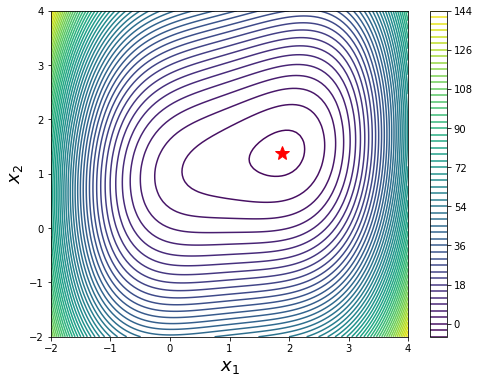

In [25]:
# a contour plot

fig, ax = plt.subplots(figsize=(8, 6))
x1 = x2 = np.linspace(-2, 4, 100)
X1, X2 = np.meshgrid(x1, x2)

# contours
c = ax.contour(X1, X2, f_(X1, X2), 50)

ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

## Quasi-Newton methods

Computing Hessians can be prohibitively costly on high-dimensional problems. Quasi-Newton methods approximate the Hessian using successive gradient evaluations. The following methods are commonly used: 

---

- the BFGS **optimize.fmin_bfgs** :

Broyden–Fletcher–Goldfarb–Shanno algorithm
https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm



a quasi-Newton method that can gradually build up numerical
estimates of the Hessian, and also the gradient, if necessary. 

---

- The conjugate-gradient methods **optimize.fmin_cg** :

Conjugate_gradient_method  
https://en.wikipedia.org/wiki/Conjugate_gradient_method

is a variant
of the steepest decent method and does not use the Hessian, and it can be used with numerical estimates
of the gradient obtained from only function evaluations.

---

In [26]:
x_opt = optimize.fmin_bfgs(f, (0, 0), fprime=fprime)
x_opt

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13


array([1.88292645, 1.37658596])

In [27]:
x_opt = optimize.fmin_cg(f, (0, 0), fprime=fprime)
x_opt

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 18
         Gradient evaluations: 18


array([1.88292612, 1.37658523])

Both of these methods can also be used without providing a function for the gradient as well.

In this case, the gradient is typically computed using numerical finite differences:
$$\frac{\partial f}{\partial x_i}(x) \approx \frac{1}{2 \epsilon} (f(x + \epsilon e_i) - f(x - \epsilon e_i))$$

**Drawback**: the number of function evaluations will typically be much higher.

In [28]:
x_opt = optimize.fmin_bfgs(f, (0, 0))
x_opt

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 39
         Gradient evaluations: 13


array([1.88292645, 1.37658596])


The methods for multivariate optimization that we have discussed so far all **converge to a local
minimum** in general.

For problems with many local minima, this can easily lead to a situation when the
solver easily gets stuck in a local minimum, even if a global minimum exists.




### Brute Force
---

Although there is no complete
and general solution to this problem, a practical approach is 
brute force search over a coordinate grid to find a suitable starting point for an iterative solver. 

---


At least this gives a systematic approach to find a global minimum within given coordinate ranges. 


Consider the problem of minimizing the function: 

$$4 sin (\pi x) + 6 sin (\pi y) + ( x - 1 )^2 + ( y - 1 )^2,$$ 

which has a large number of local minima. 


---


This can make it tricky to pick a suitable initial point for an interative solver. To solve this optimization problem
with SciPy, we first define a Python function for the objective function:
    
    

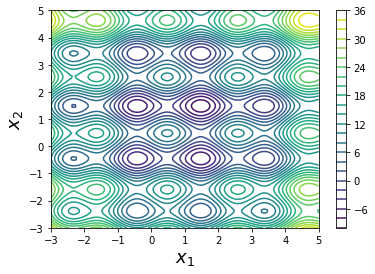

In [29]:
def f(U):
    x, y = U
    return (4 * np.sin(np.pi * x) + 6 * np.sin(np.pi * y)) + (x - 1)**2 + (y - 1)**2

def func_X_Y_to_XY(f, X, Y):
    """
    Wrapper for f(X, Y) -> f([X, Y])
    """
    s = np.shape(X)
    return f(np.vstack([X.ravel(), Y.ravel()])).reshape(*s)

fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-3, 5, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 25)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brute.html

In [30]:
x_start = optimize.brute(f, (slice(-3, 5), slice(-3, 5))) 
print(x_start, f(x_start))

[1.47589495 1.48368501] -9.520229236744578


In [31]:
x_opt = optimize.fmin_bfgs(f, x_start)

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5


In [32]:
print(x_opt, f(x_opt))

[1.47586908 1.48365789] -9.520229273055037


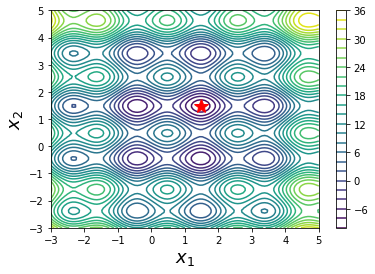

In [33]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-3, 5, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 25)
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

In [34]:
#We could as well have used:

x_opt = optimize.fmin_bfgs(f, x_start)

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5


In [35]:
print("x_opt:", x_opt)
print("result:", f(x_opt))

x_opt: [1.47586908 1.48365789]
result: -9.520229273055037


In [36]:
result = optimize.minimize(f, x_start, method='BFGS')
x_opt = result.x

In [37]:
print("x_opt:", x_opt)
print("result:", f(x_opt))

x_opt: [1.47586908 1.48365789]
result: -9.520229273055037


Constrained Optimization
---

As an example of solving a bounded optimization problem with the L-BFGS-B solver, consider
minimizing the objective function: 
$$f(x) = (x_1 - 1)^2 + (x_2 - 1)^2$$ 
subject to the constraints $$2 \leq x_1 \leq 3$$
and 
$$0 \leq x_2 \leq 2.$$

---

- Define a function for the objective functions, and tuples with the
boundaries for each of the two variables in this problem, according to the given constraints. 

- For comparison, we solve both the unconstrained and unconstrained optimization problems, and plot a contour graph of the objective function.

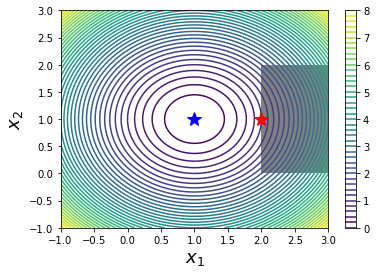

In [38]:
def f(X):
    x, y = X
    return (x - 1)**2 + (y - 1)**2

# unconstrained optimization
x_opt = optimize.minimize(f, np.array([1, 1]), method='BFGS').x

# constrained optimization
bnd_x1, bnd_x2 = (2, 3), (0, 2)

#'L-BFGS-B limited-memory with bound constraints
x_cons_opt = optimize.minimize(f, np.array([1, 1]), method='L-BFGS-B', 
                               bounds=[bnd_x1, bnd_x2]).x

# plot function
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
# compare the two solutions
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)



# plot a feasible region (in this case it is a rectangle)
bound_rect = plt.Rectangle((bnd_x1[0], bnd_x2[0]), bnd_x1[1] - bnd_x1[0], 
                           bnd_x2[1] - bnd_x2[0], facecolor="grey")
ax.add_patch(bound_rect)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

**Note:**

- Constraints that are defined by equalities or inequalities that include more than one variable are more complicated to deal with. 

- For example, using the Lagrange multipliers, it is possible to convert a constrained optimization problem to an unconstrained problem by introducing additional variables.

### Linear Programming

- LP: linear objective function with linear constraints. Has many useful applications

- Can be solved efficiently using convex solvers

- A popular algorithm for this type of problems is known as simplex, which systematically moves from one vertex to another until the optimal vertex has been reached;

- Interior point methods can also efficiently solve linear programming problems



**Definition**

$$ \min c^T x$$

$$s.t. \quad Ax \leq b$$ 

where $c, x \in \mathbf{R}^n$, $A \in \mathbf{R}^{m \times n}$ and $b \in \mathbf{R}^m$.

From the book *Convex Optimization* by Boyd and Vandenberghe:
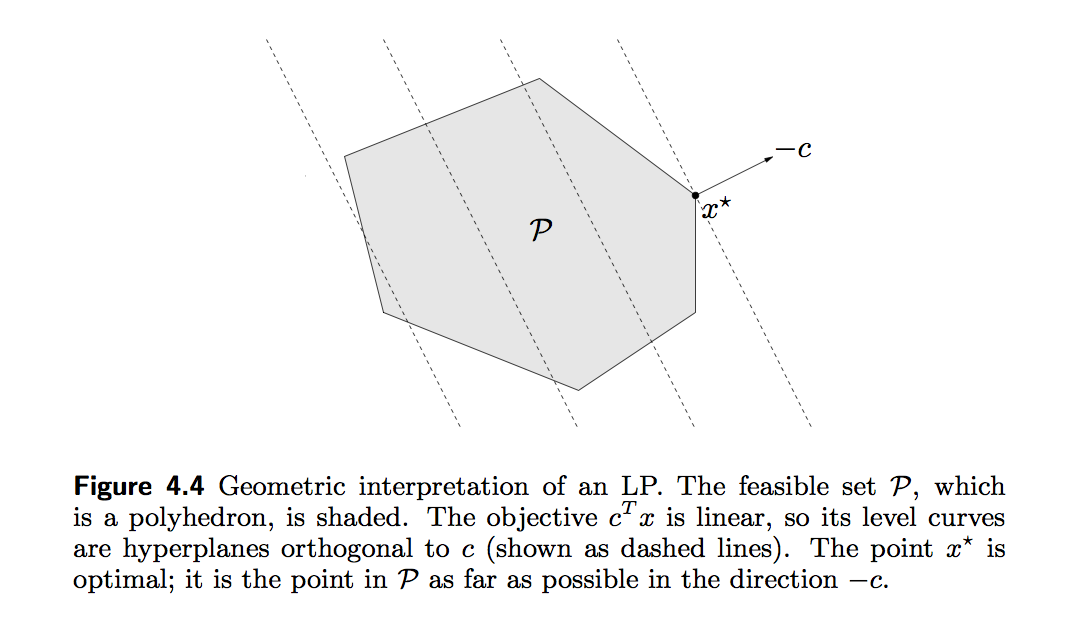

To solve this problem, we use the **cvxpy library**, which provides general solvers for **convex** problems

In [39]:
c = np.array([-1.0, 2.0, -3.0])
A = np.array([[ 1.0, 1.0, 0.0], 
              [-1.0, 3.0, 0.0], 
              [ 0.0, -1.0, 1.0]])

b = np.array([1.0, 2.0, 3.0])

import cvxpy as cp

# Define and solve the CVXPY problem.
x = cp.Variable(3)
prob = cp.Problem(cp.Minimize(c.T@x),
                 [A @ x <= b])
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)
print("A dual solution is")
print(prob.constraints[0].dual_value)


The optimal value is -9.999999994440403
A solution x is
[0.25429208 0.74570792 3.74570791]
A dual solution is
[1.00000002e+00 1.08447493e-08 3.00000002e+00]


A linear programming problem with thousands of variables can be solved.

`cvxpy` can solve many more kinds of convex programs (QP, SDP, SOCP, ...) https://www.cvxpy.org/index.html
